# Bathub
Analizamos el ratio de errores que se crean a lo largo del experimento, se espera encontrar que el ratio de errores en un intervalo $\Delta t$ se encuentre fijo y no varié con el tiempo.

De encontrarnos con un ratio fijo $\lambda$ el modelo de Weibul puede simplificarse a un modelo estadistico de Poisson más simple y director de hacer fit,
Encontrandonos además en el intervalo de vida util del aparato.

In [1]:
from lib.cpld import read_cpld_data, cpld_pipeline

## Beam OFF
Datos en seco, sin el beam encendido
- $\Delta t$ no puede ser elegido a partir del flux, pues sería un tiempo infinito. Por ello esto es solo para ver la existencia de errores sin el beam.

Si bien no se detectan errores del modulo solo observamos errores del sistema de comunicación, estos son los marcados como bad_lines.

In [2]:
# Dry data 0912 -> 0914
df_dry2, df_dry2_bad = read_cpld_data('../0_raw/Campaign2/cpld/dry/cpld_data_*.dat', debug=True)

df_dry2_valid, (edges_dry, resets_dry) ,(edges_up_dry, edges_dn_dry), bit_periodic_dry2 = cpld_pipeline(df_dry2, debug=True)

  Registros válidos: 93895
  Registros inválidos: 0


[DEBUG] Filtrado: 93895 muestras válidas (de 93895)
[DEBUG] Extraídos bits: matriz (93895, 32)
[DEBUG] fails_inst y fails_acum calculados
[DEBUG] Conteo de flancos (subida y bajada) calculado
[DEBUG] Métricas asignadas. Pipeline completo en 85987.37s


In [3]:
len(df_dry2_valid)

93895

In [4]:
# no hay errores presentes
bit_periodic_dry2.sum(axis=1).sum()

np.int64(0)

Dry luego de ser irradiado tras la campaña 2,
(campaign 3 dry run)

In [5]:
df_dry3, df_dry3_bad = read_cpld_data(cpld_path = '../0_raw/Campaign3/cpld/dry/cpld_data_*.dat', debug=True)
df_dry3_valid, (edges_dry3, resets_dry3) ,(edges_up_dry3, edges_dn_dry3), bit_periodic_dry3 = cpld_pipeline(df_dry3, debug=True)

  Registros válidos: 83583
  Registros válidos: 83583
  Registros inválidos: 971
  Registros inválidos: 971


[DEBUG] Filtrado: 28 muestras válidas (de 83583)
[DEBUG] Extraídos bits: matriz (28, 24)
[DEBUG] fails_inst y fails_acum calculados
[DEBUG] Conteo de flancos (subida y bajada) calculado
[DEBUG] Métricas asignadas. Pipeline completo en 85987.98s


In [6]:
bit_periodic_dry3.sum(axis=1).sum()

np.int64(0)

$\rightarrow$ No se detecta daño de desplazamiento que quedará tras la run 2

## Beam ON
Datos con el beam encendido
- Incorporar la información del flux para tener un tiempo equivalente

In [7]:
# Campaign 2 CPLD: 0914 -> 0920
df2, df2_bad = read_cpld_data(cpld_path = '../0_raw/Campaign2/cpld/run/cpld_data_*.dat', debug=True)
df2_valid, (edges2, resets2) ,(edges_up2, edges_dn2), bit_periodic2 = cpld_pipeline(df2, debug=True)

  Registros válidos: 1030588
  Registros válidos: 1030588
  Registros válidos: 1030588
  Registros inválidos: 37610
  Registros inválidos: 37610
  Registros inválidos: 37610


[DEBUG] Filtrado: 1030123 muestras válidas (de 1030588)
[DEBUG] Extraídos bits: matriz (1030123, 32)
[DEBUG] fails_inst y fails_acum calculados
[DEBUG] Conteo de flancos (subida y bajada) calculado
[DEBUG] Métricas asignadas. Pipeline completo en 86002.30s


In [8]:
# Campaign 3 CPLD: 1109 -> 1115
df3, df3_bad = read_cpld_data(cpld_path = '../0_raw/Campaign3/cpld/run/cpld_data_*.dat', debug=True)

df3.drop("B2",axis=1, inplace=True)

df3_valid, (edges3, resets3) ,(edges_up3, edges_dn3), bit_periodic3 = cpld_pipeline(df3, debug=True)

  Registros válidos: 1081111
  Registros válidos: 1081111
  Registros válidos: 1081111
  Registros válidos: 1081111
  Registros inválidos: 40769
  Registros inválidos: 40769
  Registros inválidos: 40769
  Registros inválidos: 40769


[DEBUG] Filtrado: 1081006 muestras válidas (de 1081111)
[DEBUG] Extraídos bits: matriz (1081006, 16)
[DEBUG] fails_inst y fails_acum calculados
[DEBUG] Conteo de flancos (subida y bajada) calculado
[DEBUG] Métricas asignadas. Pipeline completo en 86018.20s


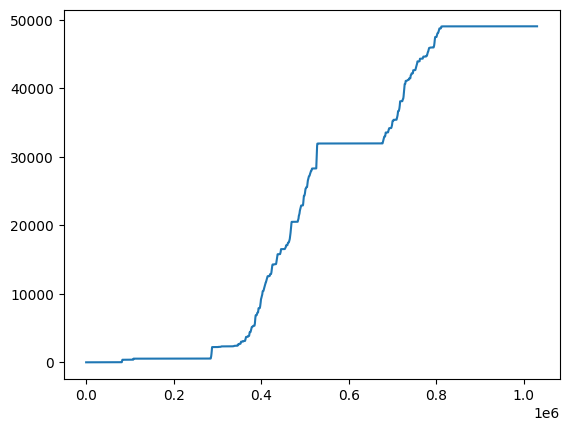

In [9]:
import matplotlib.pyplot as plt
plt.plot(bit_periodic2.sum(axis=1))

In [10]:
bit_periodic2.sum(axis=0)

array([ 277335775,  757796842,  933518567,  323567524,  274851907,
         53317371, 1355874605,  217283980,  685552510, 2275413424,
       1340475552,   10812030,  620227395,  856660339,  133414434,
        931588910,  456902704,  505589884,  892102853,  497211657,
        517250313,  945185812,  134765201, 1061525003,  301739512,
        980895106, 1008786745,  135420575, 1248752204, 1446543959,
        914907808, 1847509464])

In [11]:
print("Errores detectados con el beam on")
total_errs_2 = bit_periodic2[-1].sum()
total_errs_3 = bit_periodic3[-1].sum()
print(f"Errores totales de run2 = {total_errs_2}. run3 = {total_errs_3}")

print("shapes")
print(f"run2: {df2_valid.shape}, run3: {df3_valid.shape}")


Errores detectados con el beam on
Errores totales de run2 = 49011. run3 = 109627
shapes
run2: (1030123, 72), run3: (1081006, 38)


In [12]:
print(df2_valid.shape)
print(df2_valid.columns)
df2_valid.head()

(1030123, 72)
Index(['time', 'lfsrTMR', 'B0', 'B1', 'B2', 'B3', 'fails_inst', 'fails_acum',
       'bitn0', 'bitnP0', 'bitn1', 'bitnP1', 'bitn2', 'bitnP2', 'bitn3',
       'bitnP3', 'bitn4', 'bitnP4', 'bitn5', 'bitnP5', 'bitn6', 'bitnP6',
       'bitn7', 'bitnP7', 'bitn8', 'bitnP8', 'bitn9', 'bitnP9', 'bitn10',
       'bitnP10', 'bitn11', 'bitnP11', 'bitn12', 'bitnP12', 'bitn13',
       'bitnP13', 'bitn14', 'bitnP14', 'bitn15', 'bitnP15', 'bitn16',
       'bitnP16', 'bitn17', 'bitnP17', 'bitn18', 'bitnP18', 'bitn19',
       'bitnP19', 'bitn20', 'bitnP20', 'bitn21', 'bitnP21', 'bitn22',
       'bitnP22', 'bitn23', 'bitnP23', 'bitn24', 'bitnP24', 'bitn25',
       'bitnP25', 'bitn26', 'bitnP26', 'bitn27', 'bitnP27', 'bitn28',
       'bitnP28', 'bitn29', 'bitnP29', 'bitn30', 'bitnP30', 'bitn31',
       'bitnP31'],
      dtype='object')


,time,lfsrTMR,B0,B1,B2,B3,fails_inst,fails_acum,bitn0,bitnP0,...,bitn27,bitnP27,bitn28,bitnP28,bitn29,bitnP29,bitn30,bitnP30,bitn31,bitnP31
0,2022-09-14 11:35:48.885571,0,FF00,FF00,FF00,FF00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022-09-14 11:35:49.306446,0,FF00,FF00,FF00,FF00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2022-09-14 11:35:49.727205,0,FF00,FF00,FF00,FF00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2022-09-14 11:35:50.135328,0,FF00,FF00,FF00,FF00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022-09-14 11:35:50.556157,0,FF00,FF00,FF00,FF00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
print(df3_valid.shape)
print(df3_valid.columns)
df3_valid.head()

(1081006, 38)
Index(['time', 'lfsrTMR', 'B0', 'B1', 'fails_inst', 'fails_acum', 'bitn0',
       'bitnP0', 'bitn1', 'bitnP1', 'bitn2', 'bitnP2', 'bitn3', 'bitnP3',
       'bitn4', 'bitnP4', 'bitn5', 'bitnP5', 'bitn6', 'bitnP6', 'bitn7',
       'bitnP7', 'bitn8', 'bitnP8', 'bitn9', 'bitnP9', 'bitn10', 'bitnP10',
       'bitn11', 'bitnP11', 'bitn12', 'bitnP12', 'bitn13', 'bitnP13', 'bitn14',
       'bitnP14', 'bitn15', 'bitnP15'],
      dtype='object')


,time,lfsrTMR,B0,B1,fails_inst,fails_acum,bitn0,bitnP0,bitn1,bitnP1,...,bitn11,bitnP11,bitn12,bitnP12,bitn13,bitnP13,bitn14,bitnP14,bitn15,bitnP15
0,2022-11-09 11:52:17.613816,0,FF00,FF00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022-11-09 11:52:18.022465,0,FF00,FF00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2022-11-09 11:52:18.835929,0,FF00,FF00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2022-11-09 11:52:19.240983,0,FF00,FF00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022-11-09 11:52:19.648855,0,FF00,FF00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Beam
Incorporar los datos del beam

In [14]:
from lib.beam import read_beam_data, beam_pipeline

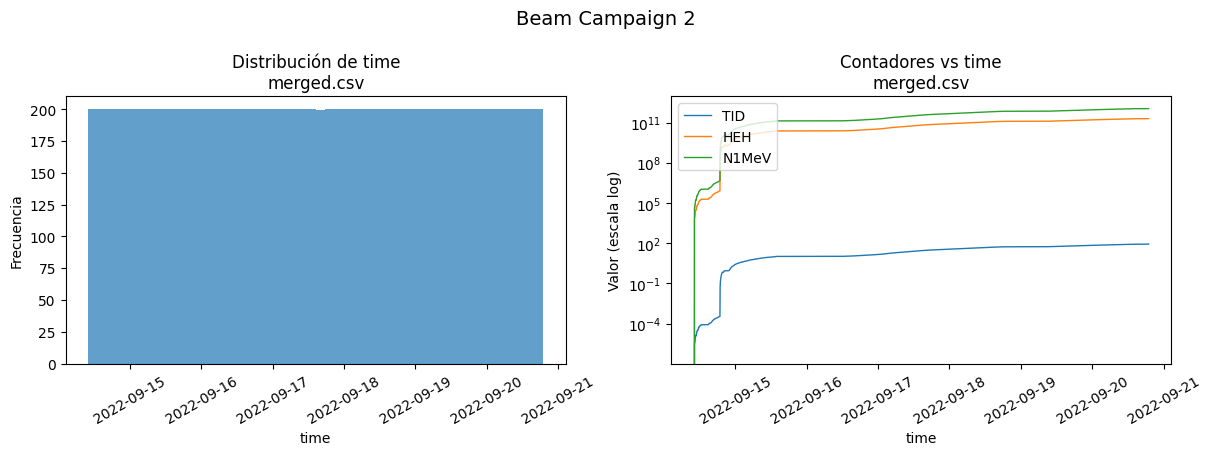

Percentage of Beam ON 0.7746774677467747
466424.8462893017 hadrons/sec
2617457.488321321 neutrons/sec


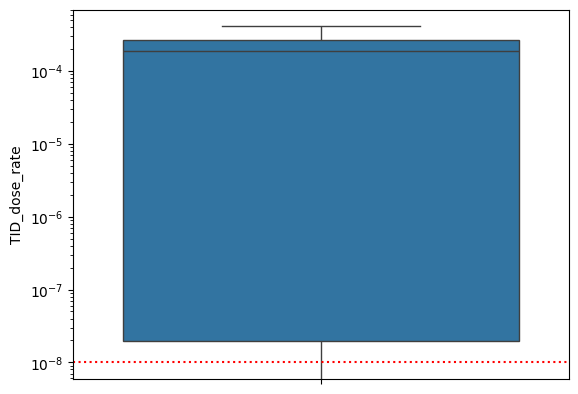

array([[<Axes: title={'center': 'TID_dose_rate'}>]], dtype=object)

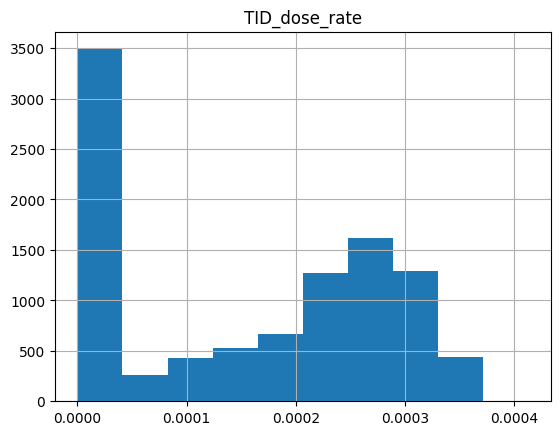

In [15]:
df_beam2 = read_beam_data("../0_raw/Campaign2/beam/merged.csv", run_id=2, plot=True, title="Beam Campaign 2")
df_beam2 = beam_pipeline(df_beam2, epsilon=1e-8, debug=True, debug_plot=True)

df_beam2.hist('TID_dose_rate')

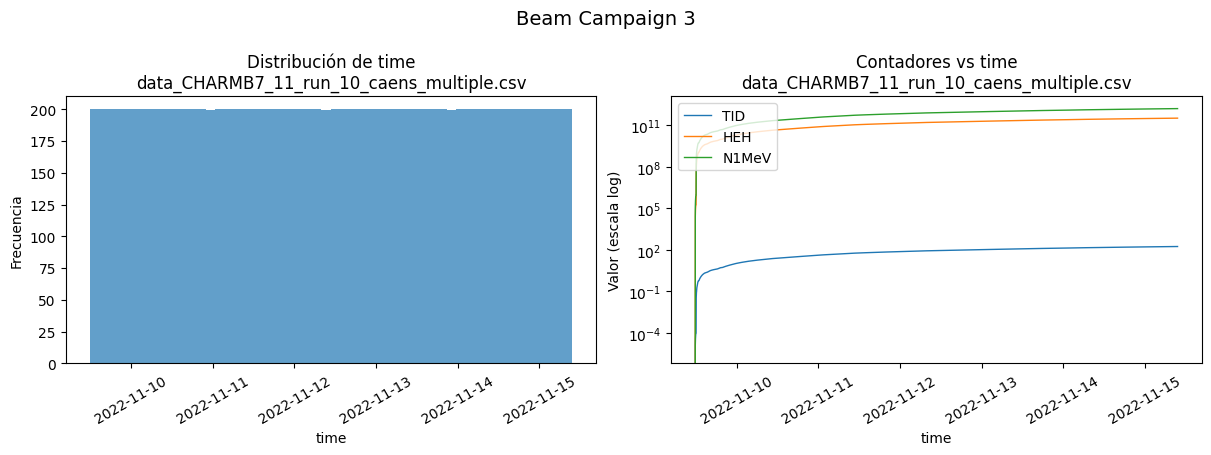

Percentage of Beam ON 0.9897969390817245
657881.2245137151 hadrons/sec
3223121.381026227 neutrons/sec


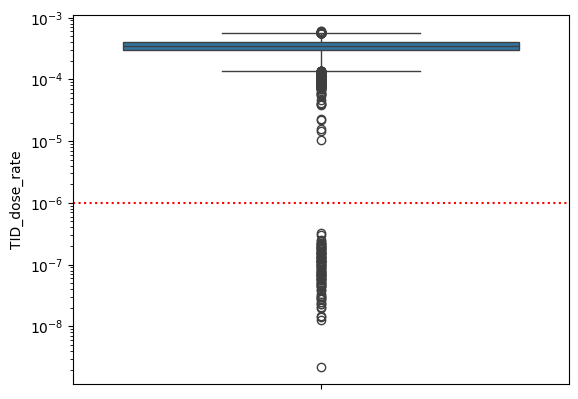

In [16]:
df_beam3 = read_beam_data("../0_raw/Campaign3/beam/data_CHARMB7_11_run_10_caens_multiple.csv", run_id=3, plot=True, title="Beam Campaign 3")
df_beam3 = beam_pipeline(df_beam3, epsilon=1e-6, debug=True, debug_plot=True)

## Merge de los datos
Se propuso crear un tiempo equivalente basado en el flujo de particulas,

Si comenzamos simple, se puede proponer un modelo de Poisson cuyo ratio de errores depende unicamente del flujo instantaneo de hadroned de alta energia (HEH)
    - en caso de que a lo largo del tiempo se mida una diferencia significativa del 'error_rate', osea confirmar que no es constante, indicaria la necesidad de un modelo de envejecimiento como Weibull

In [17]:
from lib.graphing import coincidence_time

In [18]:
print("Columnas")
print("--- run2 ---")
print(df_beam2.columns)
print("--- run3 ---")
print(df_beam3.columns)

Columnas
--- run2 ---
Index(['time', 'TID', 'HEH', 'N1MeV', 'run_group', 'dt', 'dTID', 'dHEH',
       'dN1MeV', 'TID_dose_rate', 'N1MeV_dose_rate', 'HEH_dose_rate',
       'beam_on'],
      dtype='object')
--- run3 ---
Index(['time', 'TID', 'HEH', 'N1MeV', 'run_group', 'dt', 'dTID', 'dHEH',
       'dN1MeV', 'TID_dose_rate', 'N1MeV_dose_rate', 'HEH_dose_rate',
       'beam_on'],
      dtype='object')


In [19]:
# Solo utilizando mientras el beam se encuentra encendido
df_beam2_filtered = df_beam2[df_beam2['beam_on']]
df_beam3_filtered = df_beam3[df_beam3['beam_on']]

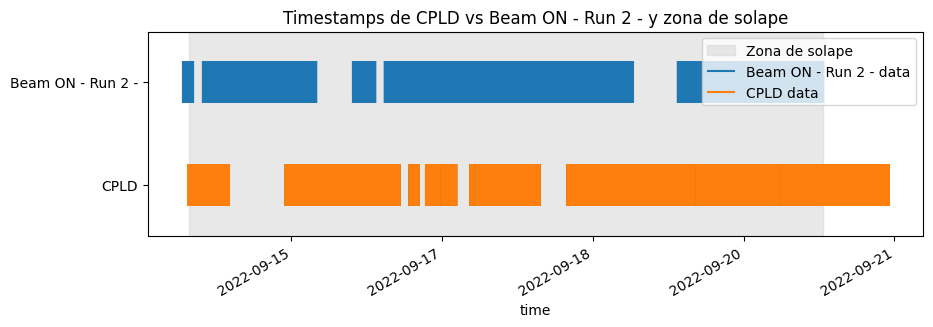

In [20]:
coincidence_time(df_beam2_filtered.time, df2_valid.time, data_labels=["Beam ON - Run 2 -", "CPLD"])

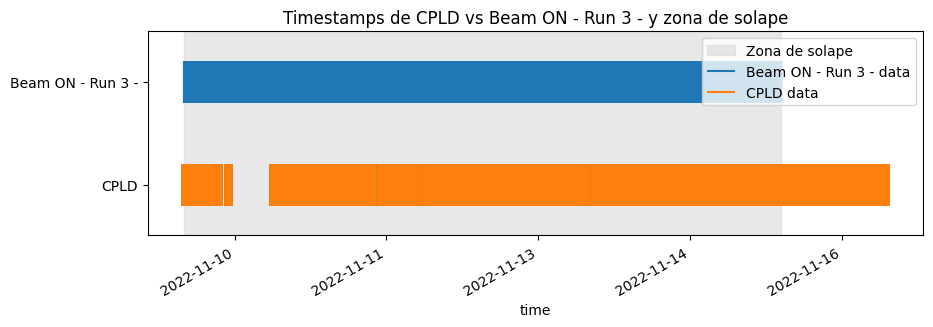

In [21]:
coincidence_time(df_beam3_filtered.time, df3_valid.time, data_labels=["Beam ON - Run 3 -", "CPLD"])

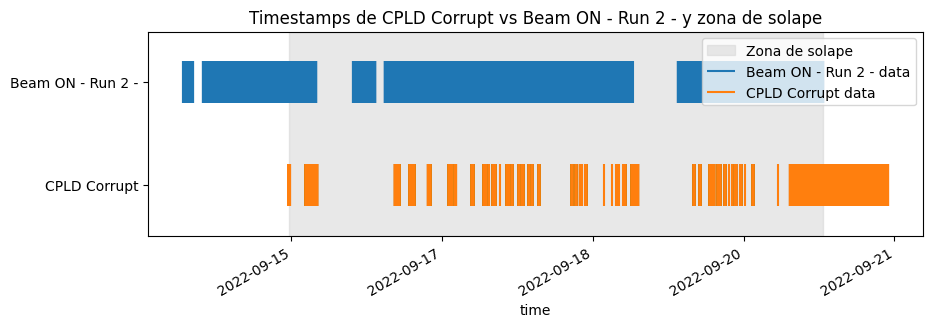

In [22]:
coincidence_time(df_beam2_filtered.time, df2_bad.ts, data_labels=["Beam ON - Run 2 -", "CPLD Corrupt"])

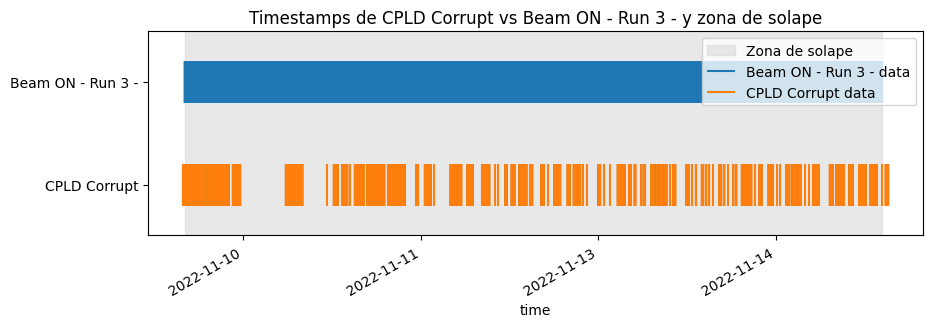

In [23]:
coincidence_time(df_beam3_filtered.time, df3_bad.ts, data_labels=["Beam ON - Run 3 -", "CPLD Corrupt"])

# Error rate vs Flux as equivalent time

Cuidados:
- Run2 posee 32 subsistemas, por lo que el area efectiva del dispotivo será cerca del doble de Run3
- Run3 posee 16 subsistemas, tengase esto en cuenta.

In [24]:
df2_valid["failsP_acum"] = df2_valid[[f"bitnP{i}" for i in range(0,32)]].sum(axis=1)
df3_valid["failsP_acum"] = df3_valid[[f"bitnP{i}" for i in range(0,16)]].sum(axis=1)

fails_run2 = df2_valid[["time", "lfsrTMR", "failsP_acum"]]
fails_run3 = df3_valid[["time", "lfsrTMR", "failsP_acum"]]

In [25]:
df_beam2.to_csv("../1_data/beam2.csv")
df_beam3.to_csv("../1_data/beam3.csv")
df2_valid.to_csv("../1_data/df2_valid.csv")
df3_valid.to_csv("../1_data/df3_valid.csv")

In [26]:
print("--- run2 ---")
print("Beam Data:")
print("\tshape:", df_beam2.shape)
print("\tcolumns:",df_beam2.columns)
print("Fails Data")
print("\tshape:", fails_run2.shape)
print("\tcolumns:",fails_run2.columns)

print("--- run3 ---")
print("Beam Data:")
print("\tshape:", df_beam3.shape)
print("\tcolumns:",df_beam3.columns)
print("Fails Data")
print("\tshape:", fails_run3.shape)
print("\tcolumns:",fails_run3.columns)


--- run2 ---
Beam Data:
	shape: (9999, 13)
	columns: Index(['time', 'TID', 'HEH', 'N1MeV', 'run_group', 'dt', 'dTID', 'dHEH',
       'dN1MeV', 'TID_dose_rate', 'N1MeV_dose_rate', 'HEH_dose_rate',
       'beam_on'],
      dtype='object')
Fails Data
	shape: (1030123, 3)
	columns: Index(['time', 'lfsrTMR', 'failsP_acum'], dtype='object')
--- run3 ---
Beam Data:
	shape: (9997, 13)
	columns: Index(['time', 'TID', 'HEH', 'N1MeV', 'run_group', 'dt', 'dTID', 'dHEH',
       'dN1MeV', 'TID_dose_rate', 'N1MeV_dose_rate', 'HEH_dose_rate',
       'beam_on'],
      dtype='object')
Fails Data
	shape: (1081006, 3)
	columns: Index(['time', 'lfsrTMR', 'failsP_acum'], dtype='object')


## Poisson Binning

In [27]:
import pandas as pd
from radbin.core import recommend_k_multiple, build_and_summarize
from radbin.glm import poisson_trend_test_plus

# Given your shapes / columns:
# df_beam2, fails_run2; df_beam3, fails_run3
# run2 had 32 subsystems, run3 had 16

# 0) Pick a debounce (seconds) to avoid counting a continuous fault storm many times
MIN_SEP = 0.5  # example, tune with your sampling/engineering knowledge
TARGET_EVENTS = 8  # aim 5–15 events/bin

# 1) Choose k (how many reset-intervals per bin)
k2 = recommend_k_multiple(fails_run2, target_events_per_bin=TARGET_EVENTS, min_separation=MIN_SEP)
k3 = recommend_k_multiple(fails_run3, target_events_per_bin=TARGET_EVENTS, min_separation=MIN_SEP)

# 2) Build bins, aggregate exposure, and estimate rates
bins2 = build_and_summarize(
    df_beam2, fails_run2,
    bin_mode="reset",
    k_multiple=k2,
    flux_col="N1MeV_dose_rate",   # SEE proxy
    T_source="beam",
)

bins3 = build_and_summarize(
    df_beam3, fails_run3,
    bin_mode="reset",
    k_multiple=k3,
    flux_col="N1MeV_dose_rate",
    T_source="beam",
)

# bins*.columns include radbin summaries such as:
# ['t_start','t_end','t_mid','width_s','N','T','rate','lo','hi', ...]
# Divide `rate` by the number of subsystems if you need per-subsystem values.

# 3) Is the rate changing over time? (trend test; eq-time recommended)
trend2 = poisson_trend_test_plus(bins2)
trend3 = poisson_trend_test_plus(bins3)

print("Run2 trend Wald p-value:", trend2["wald_p_two_sided"], "bins:", trend2.get("n_bins"))
print("Run3 trend Wald p-value:", trend3["wald_p_two_sided"], "bins:", trend3.get("n_bins"))

# Interpretation:
#   p > 0.05 → no significant slope → rate ~ constant (useful life)
#   p <= 0.05 → significant slope → aging (early/late-life tail)


Run2 trend p-value: nan converged: False bins: 1
Run3 trend p-value: nan converged: False bins: 1
